In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [16]:
df = pd.read_csv('./VF_data/pandemos_tra_tapas_modell.csv')

In [17]:
print(df.columns, df.shape)

Index(['p_id', 'taz_id_start', 'loc_id_start', 'lon_start', 'lat_start',
       'taz_id_end', 'loc_id_end', 'lon_end', 'lat_end', 'start_time_min',
       'travel_time_sec', 'mode', 'activity', 'activity_start_min',
       'activity_duration_min'],
      dtype='object') (13578537, 15)


In [41]:
df['taz_id_start']

0            468
1            467
2            466
3             87
4            728
            ... 
13578532      12
13578533     950
13578534    1094
13578535     437
13578536     823
Name: taz_id_start, Length: 13578537, dtype: int64

In [18]:
col = 'p_id'
print(df[col].unique().shape)
print('Berlin:', df.lon_start.mean(), df.lat_start.mean())

(3378779,)
Berlin: 13.390579705825525 52.50711667264259


In [19]:
dfn = pd.read_csv('./VF_data/region_niedersachsen_tapas_modell.csv')

In [20]:
print(dfn.columns, dfn.shape)

Index(['p_id', 'hh_id', 'scheme_id', 'score_combined', 'score_finance',
       'score_time', 'taz_id_start', 'taz_has_toll_start', 'block_id_start',
       'loc_id_start', 'lon_start', 'lat_start', 'taz_id_end',
       'taz_has_toll_end', 'block_id_end', 'loc_id_end', 'lon_end', 'lat_end',
       'start_time_min', 'travel_time_sec', 'mode', 'car_type',
       'distance_bl_m', 'distance_real_m', 'activity', 'is_home',
       'activity_start_min', 'activity_duration_min', 'car_index',
       'is_restricted', 'p_group', 'taz_bbr_type_start', 'bbr_type_home',
       'loc_selection_motive', 'loc_selection_motive_supply'],
      dtype='object') (9012236, 35)


In [48]:
dfn.is_home

0          t
1          f
2          t
3          f
4          f
          ..
9012231    t
9012232    f
9012233    f
9012234    t
9012235    f
Name: is_home, Length: 9012236, dtype: object

In [21]:
col = 'p_id'
print(dfn[col].unique().shape)
print('Zwischen Hannover, Hildesheim, Braunschweig:', dfn.lon_start.mean(), dfn.lat_start.mean())

(2416665,)
Zwischen Hannover, Hildesheim, Braunschweig: 10.089054078991449 52.326711186191


In [22]:
dfn.travel_time_sec = dfn.travel_time_sec / 60

In [23]:
pd.set_option('display.max_columns', None)
dfn[['p_id', 'loc_id_start', 'loc_id_end', 'activity_start_min', 'activity_duration_min', 'travel_time_sec']][1:8]

,p_id,loc_id_start,loc_id_end,activity_start_min,activity_duration_min,travel_time_sec
1,101703905,-100912769,220009,415,1,1.666667
2,101703905,220009,-100912769,418,485,1.666667
3,101703905,-100912769,220132,905,185,2.650000
4,101703905,220132,220015,1205,1,114.766667
5,101703905,220015,121202,1209,1,3.016667
6,101703905,121202,66647,1214,5,3.483333
7,101703905,66647,-100912769,1222,155,3.766667


In [24]:
dfn[['p_id', 'p_group']].head(20)

,p_id,p_group
0,102359869,2
1,101703905,17
2,101703905,17
3,101703905,17
4,101703905,17
5,101703905,17
6,101703905,17
7,101703905,17
8,102188335,19
9,102188335,19


2 16 3.7292036753128794


Text(0.5, 1.0, 'Number of trajectories per Person')

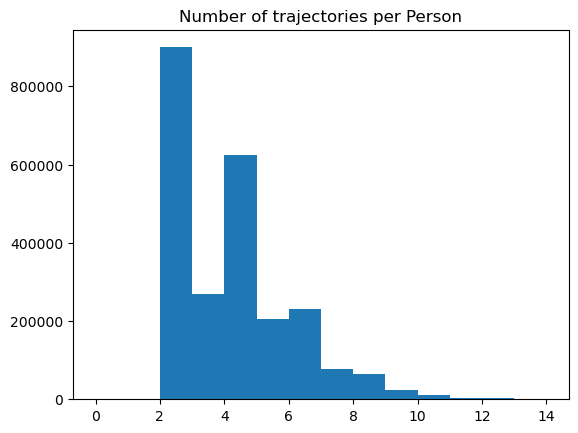

In [25]:
counts = dfn.p_id.value_counts()
print(counts.min(), counts.max(), counts.mean())
plt.hist(counts, bins = np.arange(0, 15, 1))
plt.title('Number of trajectories per Person')

In [26]:
print(dfn.loc_id_start.unique().shape, dfn.lon_start.unique().shape, dfn.lat_start.unique().shape)

(1467990,) (574356,) (574356,)


In [59]:
df.loc_id_end.unique().shape

(2314350,)

In [50]:
equals = []
print(dfn.loc_id_end.value_counts()[:10])
for mode in dfn.loc_id_end.value_counts()[:10].index:
    numbers = dfn[dfn.loc_id_end == mode].lon_end.to_numpy()
    lats = dfn[dfn.loc_id_end == mode].lat_end.to_numpy()
    print(mode, lats[0], numbers[0])
    equals.append(np.all(np.isclose(numbers, numbers[0])) & np.all(np.isclose(lats, lats[0])))
np.all(np.array(equals))

loc_id_end
63584     29448
23748     28751
64657     18929
160826    17777
111078    16834
6652      16472
6651      16424
6650      16389
151199    16242
6631      16201
Name: count, dtype: int64
63584 52.4351838347954 10.7954146421989
23748 52.3155092343708 9.72305235834613
64657 52.3158663355703 10.2412482278461
160826 52.4307247229025 9.41892106717344
111078 52.4033829319789 9.7910330899053
6652 52.1547196 9.9504141
6651 52.1542446 9.9496464
6650 52.154668 9.9488243
151199 52.4486355686275 9.59736372213283
6631 52.3786865 9.736474


True

In [28]:
equals = []
print(df.loc_id_start.value_counts()[:10])
for mode in df.loc_id_start.value_counts()[:10].index:
    numbers = df[df.loc_id_start == mode].lon_start.to_numpy()
    lats = df[df.loc_id_start == mode].lat_start.to_numpy()
    print(mode, numbers[0], lats[0])
    equals.append(np.all(np.isclose(numbers, numbers[0])) & np.all(np.isclose(lats, lats[0])))
np.all(np.array(equals))

loc_id_start
198090    78647
285711    71414
2578      59237
285631    47405
285733    46881
285721    40034
285661    35993
285719    34525
239       25703
200722    25332
Name: count, dtype: int64
198090 13.3291607933491 52.5149478990297
285711 13.3054974062857 52.5096848417604
2578 13.3346601733095 52.5935054952946
285631 13.5569617931011 52.5600619693636
285733 13.5032717848567 52.534105624137
285721 13.3874882852426 52.5497058908227
285661 13.4142371742629 52.5500038468782
285719 13.3874882852426 52.5497058908227
239 13.578939474782 52.4584546781524
200722 13.3684625502677 52.4429357290867


True

In [29]:
dfn.activity_start_min.sort_values().head(20)

7404778   -122841
8471129   -108633
6070404   -108000
5287462     -2778
2818188     -2764
5287463     -2664
8434592     -2597
5287464     -2561
8434593     -2464
1566300     -2318
358615      -2146
3280672     -2005
36644       -1959
4996700     -1907
3280673     -1894
7951508     -1892
358616      -1874
3280674     -1871
6562503     -1864
3976565     -1845
Name: activity_start_min, dtype: int64

In [30]:
dfn.iloc[7404778]

p_id                                100454202
hh_id                               100257119
scheme_id                              240398
score_combined                            1.0
score_finance                             0.0
score_time                                0.0
taz_id_start                              480
taz_has_toll_start                          f
block_id_start                             -1
loc_id_start                       -100257119
lon_start                           10.856119
lat_start                           52.340455
taz_id_end                                537
taz_has_toll_end                            f
block_id_end                               -1
loc_id_end                             220925
lon_end                                   0.0
lat_end                                   0.0
start_time_min                        -124300
travel_time_sec                        1459.6
mode                                        3
car_type                          

In [31]:
def remove_outliers(dfn, col='activity_start_min', quantile_bounds=(0.001, 0.999)):
    q_low = dfn[col].quantile(quantile_bounds[0])
    q_hi  = dfn[col].quantile(quantile_bounds[1])

    return dfn[(dfn[col] < q_hi) & (dfn[col] > q_low)], q_low, q_hi

28.0 1614.0 Most of the activity occurs within a time span of: 27.366666666666667h


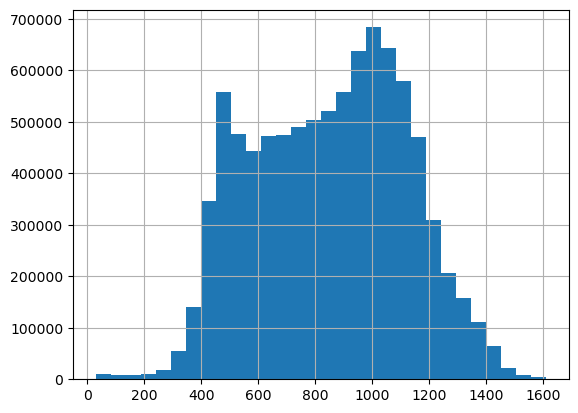

In [32]:
dfn_filtered, q_low, q_hi = remove_outliers(dfn)
dfn_filtered.activity_start_min.hist(bins=30)
print(q_low, q_hi, f'Most of the activity occurs within a time span of: {(abs(q_low) + q_hi)/60}h')

In [33]:
dfn.activity_duration_min.describe()

count    9.012236e+06
mean     2.121765e+02
std      2.102327e+02
min      1.000000e+00
25%      3.000000e+01
50%      1.350000e+02
75%      3.500000e+02
max      1.435000e+03
Name: activity_duration_min, dtype: float64

<Axes: >

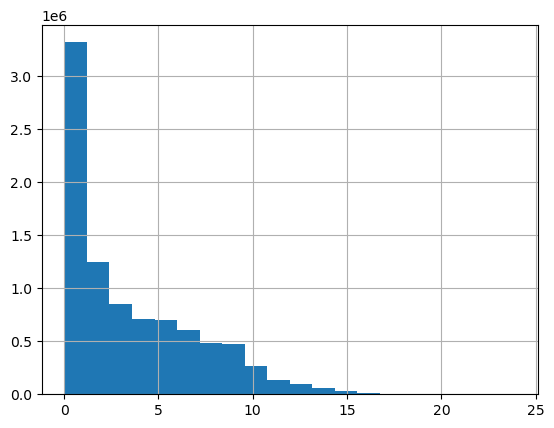

In [34]:
(dfn.activity_duration_min / 60).hist(bins=20)

# Kontaktnetzwerk aus Verkehrsdaten erstellen
Zwei Personen die sich zur gleichen Zeit an der gleichen Location befinden haben Kontakt. Die Intensität des Kontakts hängt ab von 
1. Länge des Kontakts (lässt sich aus den Daten erschließen)
2. Personengruppe, Kinder haben intensiever Kontakt als Erwachsene (lässt sich vermutlich aus den Daten erschließen)
3. Art der Location (vermutlich nicht in den Daten enthalten)
Unter (teilweiser) Berücksichtigung dieser Punkte ließe  sich für jede Person ein Kontaktnetzwerk erstellen